<a href="https://colab.research.google.com/github/ngcthanh2903/AI-homework/blob/main/food_2ndversion/food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv #thư viện opencv để xử lý ảnh thô chuyển thành dữ liệu
import numpy as np # thư viện numpy
import os #lấy đường dẫn tới thư mục chứa hình ảnh


In [35]:
X = []#tạo list chứa dữ liệu ảnh
y = []#tạo list chứa label của từng ảnh
labels = os.listdir('/content/drive/MyDrive/trainfood')#gọi biến labels là list gồm các thư mục data con chứa ảnh 

#tạo đường dẫn vào vào dataset
path='/content/drive/MyDrive'
dataset = 'trainfood'

#cho biến label trong vòng lặp list labels 
for label in labels:
        
        # Và lặp các ảnh trong thư mục
        for file in os.listdir(os.path.join(path, dataset, label)):
            # đọc ảnh            
            image = cv.imread(os.path.join(path, dataset, label, file),cv.IMREAD_UNCHANGED)
            #chuyển ảnh cấu trúc màu BGR thành RGB
            image =cv.cvtColor(image,cv.COLOR_BGR2RGB)
            image =cv.GaussianBlur(image,(5,5),0,0)
            # chuyển tên các label thành dạng số 
            classnum = labels.index(label)
            #đưa shape ảnh về kích thước 50x50
            img = cv.resize(image,(200,200))
            img = cv.normalize(img, None, alpha=0,beta=255, norm_type=cv.NORM_MINMAX)

            #đưa dữ liệu ảnh đc xử lý vào list X          
            X.append(img)
            #đưa dữ liệu label vào list y
            y.append(classnum)

In [36]:
#đưa list X về dữ liệu dạng mảng tensor
X= np.array(X)
#đưa list y vễ dạng mảng
y= np.array(y)

In [37]:
keys = np.array(range(X.shape[0]))
np.random.shuffle(keys)
X = X[keys]
y = y[keys]

In [38]:
y

array([7, 6, 1, 7, 5, 9, 3, 8, 2, 0, 8, 8, 4, 8, 7, 5, 3, 7, 5, 7, 7, 1,
       7, 8, 8, 8, 4, 2, 2, 7, 1, 0, 2, 0, 8, 1, 3, 8, 6, 8, 8, 0, 5, 4,
       3, 5, 6, 6, 4, 5, 0, 1, 6, 4, 2, 2, 4, 4, 9, 5, 8, 9, 4, 4, 8, 9,
       4, 2, 0, 8, 7, 9, 8, 7, 8, 9, 9, 3, 4, 0, 6, 2, 4, 8, 5, 0, 2, 7,
       0, 0, 3, 9, 4, 8, 3, 4, 5, 7, 3, 2, 0, 3, 6, 8, 9, 4, 7, 1, 2, 6,
       6, 1, 5, 8, 4, 7, 4, 3, 6, 4, 1, 5, 9, 6, 3, 8, 3, 5, 7, 3, 9, 2,
       5, 3, 1, 0, 8, 1, 1, 0, 5, 9, 7, 2, 8, 7, 1, 6, 2, 2, 3, 7, 8, 6,
       9, 0, 8, 1, 2, 1, 1, 7, 3, 5, 2, 6, 8, 9, 2, 7, 6, 4, 9, 1, 0, 8,
       2, 5, 3, 8, 5, 3, 3, 2, 9, 0, 3, 1, 2, 2, 4, 7, 1, 0, 0, 8, 8, 3,
       7, 5, 2, 0, 1, 3, 7, 5, 0, 5, 2, 6, 0, 9, 5, 6, 4, 2, 4, 7, 5, 8,
       6, 2, 3, 3, 1, 2, 3, 3, 6, 7, 6, 8, 0, 5, 6, 6, 5, 9, 6, 6, 9, 6,
       9, 4, 7, 8, 2, 8, 3, 1, 6, 2, 0, 2, 4, 6, 5, 4, 6, 6, 5, 5, 9, 4,
       7, 7, 4, 7, 8, 4, 5, 3, 1, 3, 8, 3, 1, 4, 9, 0, 5, 0, 9, 2, 9, 6,
       0, 3, 4, 0, 8, 8, 4, 6, 2, 2, 6, 6, 7, 1, 7,

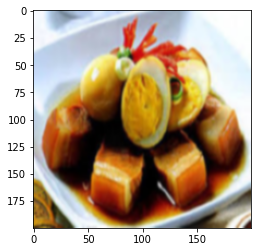

In [40]:
import matplotlib.pyplot as plt
plt.imshow(X[0])

In [41]:
from tensorflow.keras.utils import to_categorical
#onehot label y 
y= to_categorical(y,10)

In [42]:
X = X.astype('float32')

In [14]:
X /=255 

In [65]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,BatchNormalization
model= Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(200,200,3)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2),strides= 5))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2),strides= 5))

model.add(BatchNormalization())


model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2),strides= 5))

model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 200, 200, 32)      896       
                                                                 
 conv2d_40 (Conv2D)          (None, 200, 200, 64)      18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 40, 40, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 40, 40, 64)        36928     
                                                                 
 conv2d_42 (Conv2D)          (None, 40, 40, 128)       73856     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                 

In [66]:
from tensorflow.keras.optimizers import Adam,SGD

#opt= SGD(lr=0.01,momentum=0.9)
#sử dụng optimizer Adam
opt =Adam()
#cấu hình train
model.compile(opt,loss='categorical_crossentropy',metrics=['accuracy'])
#bỏ dữ liệu vô train
history = model.fit(X, y, epochs=50, batch_size=64, validation_split=(0.1), verbose=1)
#lưu model
model.save('test.h5')

Epoch 1/50
14/14 [==============================] - 3s 180ms/step - loss: 2.3537 - accuracy: 0.2258 - val_loss: 16.1143 - val_accuracy: 0.1414
Epoch 2/50
14/14 [==============================] - 2s 158ms/step - loss: 1.3903 - accuracy: 0.5135 - val_loss: 12.9514 - val_accuracy: 0.1717
Epoch 3/50
14/14 [==============================] - 2s 159ms/step - loss: 0.7963 - accuracy: 0.7483 - val_loss: 7.4320 - val_accuracy: 0.2626
Epoch 4/50
14/14 [==============================] - 2s 160ms/step - loss: 0.3868 - accuracy: 0.8910 - val_loss: 6.7619 - val_accuracy: 0.2727
Epoch 5/50
14/14 [==============================] - 2s 161ms/step - loss: 0.1220 - accuracy: 0.9820 - val_loss: 4.1467 - val_accuracy: 0.3737
Epoch 6/50
14/14 [==============================] - 2s 168ms/step - loss: 0.0409 - accuracy: 0.9989 - val_loss: 4.1633 - val_accuracy: 0.3232
Epoch 7/50
14/14 [==============================] - 2s 161ms/step - loss: 0.0184 - accuracy: 0.9978 - val_loss: 3.5403 - val_accuracy: 0.3535
Epoc

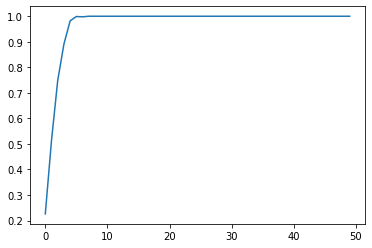

In [67]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])

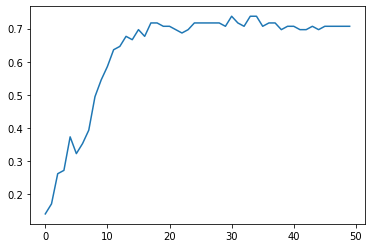

In [68]:
plt.plot(history.history['val_accuracy'])

In [69]:
labels= {0:'buncha',
         1:'banhmi',
         2:'banhchung',
         3:'bundau',
         4:'com ga',
         5:'comtam',
         6:'phơ',
         7:'thitkho',
         8:'xoi',
         9:'banhxeo'}

[[2.3394418e-06 3.6990008e-05 6.5582782e-01 8.9255491e-06 9.9451609e-02
  1.1355216e-06 3.7543471e-03 2.1166188e-05 2.2921090e-04 2.4066649e-01]]
độ chính xác: 65 %
expectation banhchung


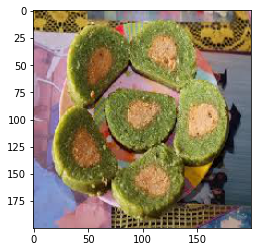

In [70]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array 
from keras.models import load_model
import numpy as np  
import matplotlib.pyplot as plt
import cv2 

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(200, 200))	
	
	return img
model = load_model('test.h5')
	# load model
img = load_image('banhtet1.jpg')
plt.imshow(img)
img = img_to_array(img)
img= cv.GaussianBlur(img,(35,35),0,0)

img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)]) 

[[7.7931285e-03 2.9003987e-04 1.7237014e-03 7.2553821e-02 3.9435810e-05
  2.1643877e-02 8.9254391e-01 2.1859016e-06 3.2163740e-03 1.9348295e-04]]
độ chính xác: 89 %
expectation phơ


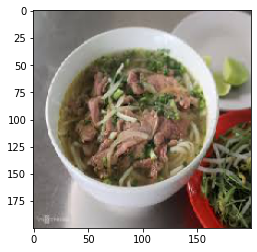

In [78]:
img = load_image('bunbo.jpg')
plt.imshow(img)
img = img_to_array(img)
img= cv.GaussianBlur(img,(5,5),0,0)

img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)]) 

[[2.7634005e-07 1.2433336e-03 3.2559915e-09 8.3940099e-09 9.8976582e-01
  1.7594014e-03 3.1425978e-07 4.1938561e-06 7.0516942e-03 1.7495670e-04]]
độ chính xác: 98 %
expectation com ga


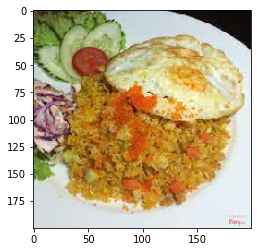

In [79]:
img = load_image('comchien.jpg')
plt.imshow(img)
img = img_to_array(img)
#img= cv.GaussianBlur(img,(5,5),0,0)

img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)])

[[4.0011943e-07 2.8505353e-08 5.2426188e-11 4.5078279e-09 1.9359327e-07
  9.9996829e-01 2.0627166e-07 2.3259670e-06 2.8518421e-05 6.6010322e-09]]
độ chính xác: 99 %
expectation comtam


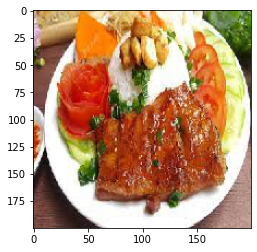

In [80]:
img = load_image('com.jpg')
plt.imshow(img)
img = img_to_array(img)
#img= cv.GaussianBlur(img,(5,5),0,0)

img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)])

[[1.5705510e-07 2.7527477e-04 9.9345891e-07 1.7047699e-07 9.9969089e-01
  3.0425624e-06 6.8100201e-09 2.1655144e-06 1.9505196e-05 7.7608574e-06]]
độ chính xác: 99 %
expectation com ga


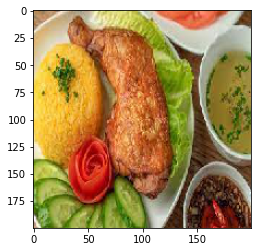

In [81]:
img = load_image('comga.jpg')
plt.imshow(img)
img = img_to_array(img)
#img= cv.GaussianBlur(img,(5,5),0,0)

img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)])

[[8.6837195e-02 3.4889146e-03 9.9322982e-03 8.8641187e-03 4.3278623e-02
  2.3027927e-01 5.9351641e-01 4.1738225e-05 2.3302371e-02 4.5903580e-04]]
độ chính xác: 59 %
expectation phơ


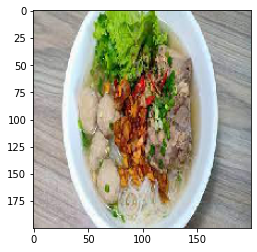

In [82]:
img = load_image('hutieu.jpg')
plt.imshow(img)
img = img_to_array(img)
img= cv.GaussianBlur(img,(5,5),0,0)

img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)])

[[2.4594503e-05 5.6755239e-06 2.0744165e-03 4.0318304e-05 9.6936937e-04
  6.0036706e-05 9.9428469e-01 9.9434988e-07 2.5355017e-03 4.4475528e-06]]
độ chính xác: 99 %
expectation phơ


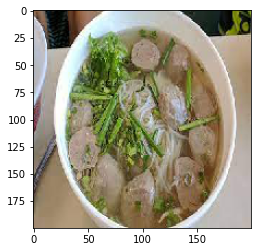

In [84]:
img = load_image('hutieubovien.jpg')
plt.imshow(img)
img = img_to_array(img)
img= cv.GaussianBlur(img,(5,5),0,0)

img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)])

[[4.6827365e-02 6.4599193e-03 8.8941935e-04 7.3613626e-01 1.3731230e-02
  5.0791241e-02 8.6003087e-02 5.3895988e-02 4.7764946e-03 4.8898143e-04]]
độ chính xác: 73 %
expectation bundau


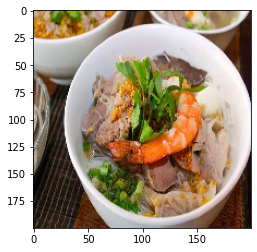

In [86]:
img = load_image('hutieunamvang.jpg')
plt.imshow(img)
img = img_to_array(img)
img= cv.GaussianBlur(img,(5,5),0,0)

img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)])

[[4.0153736e-08 6.9499170e-06 8.4087738e-08 2.0249925e-06 6.1006562e-05
  2.4169269e-05 5.0829999e-06 1.2529460e-06 9.9989855e-01 7.7944310e-07]]
độ chính xác: 99 %
expectation xoi


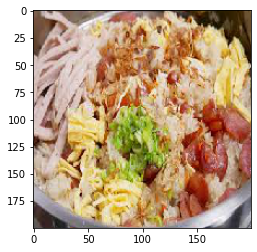

In [87]:
img = load_image('xoiga.jfif')
plt.imshow(img)
img = img_to_array(img)
img= cv.GaussianBlur(img,(5,5),0,0)

img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)])

[[1.3794202e-07 4.7376649e-05 2.4453097e-06 8.2967638e-08 4.1645771e-04
  6.6005232e-06 7.3218416e-06 9.9942625e-01 7.8446305e-05 1.4961148e-05]]
độ chính xác: 99 %
expectation thitkho


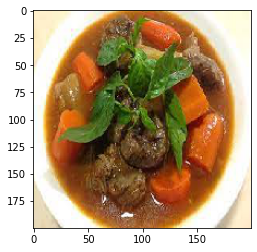

In [88]:
img = load_image('bokho.jfif')
plt.imshow(img)
img = img_to_array(img)
img= cv.GaussianBlur(img,(5,5),0,0)

img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)])

[[3.7314397e-08 2.8877553e-01 5.5281911e-04 5.1014170e-02 1.1556371e-03
  1.9788272e-06 5.1600371e-05 7.6622437e-03 1.1679699e-03 6.4961797e-01]]
độ chính xác: 64 %
expectation banhxeo


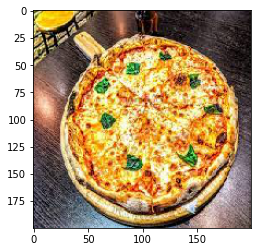

In [92]:
img = load_image('pizza.jfif')
plt.imshow(img)
img = img_to_array(img)
img= cv.GaussianBlur(img,(15,15),0,0)

img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)])

[[7.2991834e-06 9.7049969e-01 1.8775096e-05 2.6892519e-07 6.1941253e-05
  3.5096309e-03 2.4965302e-06 2.5010748e-02 8.8908907e-04 9.4766661e-10]]
độ chính xác: 97 %
expectation banhmi


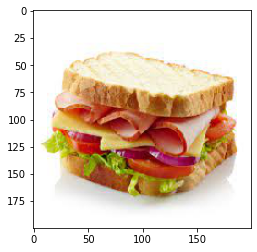

In [94]:
img = load_image('sandwich.jfif')
plt.imshow(img)
img = img_to_array(img)
img= cv.GaussianBlur(img,(5,5),0,0)

img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)])